# 2024.07.09.Tue

# 시계열 분석 정상성 확인 요약
평균 일정 x -> 차분

(분산 일정 x -> 차분 이전에 로그 변환 수행 np.log로 변환 가능)

평균, 분산 일정에 대한 시각화는 나와도 검증은 출제 안됨(모델 잔차쪽도 마찬가지)

1. 시계열 데이터 불러와서 데이터 가공

2. 정규성, 이분산성 시각화 필요한지 확인 후 필요하면 수행

3. ACF, PACF 시각화 adf test로 비정상 시계열 확인

4. 차분 등 수행 후, 3번 과정과 비교하여 정상 시계열 변환 완료 확인

# 시계열 분석용 데이터 가공 및 시각화
해당 데이터는 2020년 3월부터 2021년 3월 2일까지의 비트코인 가격에 대한 데이터 입니다.

날짜는 str 타입이고, price는 float 타입입니다.

데이터는 https://www.blockchain.com/ko/charts/market-price?timespan=60days 링크로 이동하신 다음에

export data를 하셔서 csv 파일로 받으시면 됩니다.

(파일을 csv로 했는데 파일 포맷이 csv가 아니면 이름 바꾸기로 .csv 붙이고 진행해주세요)

데이터를 불러온 다음에, 날짜가 str 타입이므로

pandas의 to_datetime을 이용하여서 pandas의 Timestamp 타입으로 변화시켜 줍니다.

그 이후, day 컬럼을 index로 해주면 바로 아래와 같은 형태로 바뀌게 됩니다.

In [27]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv', header=0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-09,30291.611328,30427.589844,30085.591797,30171.234375,30171.234375,7903327692
1,2023-07-10,30172.423828,31026.083984,29985.394531,30414.470703,30414.470703,14828209155
2,2023-07-11,30417.632813,30788.314453,30358.097656,30620.951172,30620.951172,12151839152
3,2023-07-12,30622.246094,30959.964844,30228.835938,30391.646484,30391.646484,14805659717
4,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,31476.048828,23686079548


In [28]:
df.info()
# Open : 해당 기간의 시가(첫 거래가)
# High : 해당 기간의 최고 가격
# Low : 해당 기간의 최저 가격
# Close : 해당 기간의 종가 (마지막 거래가)
# Adj Close : 보정 종가, 종종 수정 주가라고도 하며, 보통 배당이나 기업 행동에 따라 조정된 가격을 의미
#           : 주식에서 자주 사용됨
# Volume : 거래량, 해당 기간 동안의 거래된 총 양을 나타냅니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


In [29]:
df.shape

(367, 7)

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())
print("\n\n\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       367 non-null    datetime64[ns]
 1   Open       367 non-null    float64       
 2   High       367 non-null    float64       
 3   Low        367 non-null    float64       
 4   Close      367 non-null    float64       
 5   Adj Close  367 non-null    float64       
 6   Volume     367 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.2 KB
None






,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-09,30291.611328,30427.589844,30085.591797,30171.234375,30171.234375,7903327692
1,2023-07-10,30172.423828,31026.083984,29985.394531,30414.470703,30414.470703,14828209155
2,2023-07-11,30417.632813,30788.314453,30358.097656,30620.951172,30620.951172,12151839152
3,2023-07-12,30622.246094,30959.964844,30228.835938,30391.646484,30391.646484,14805659717
4,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,31476.048828,23686079548


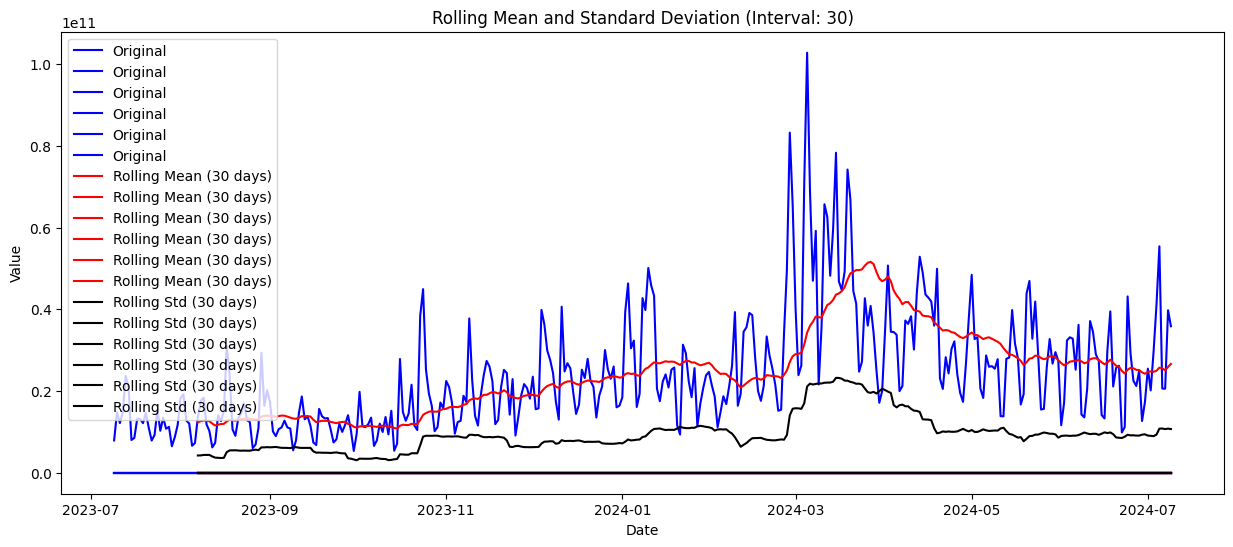

In [31]:
def plot_rolling(data, interval):
    # 데이터프레임에서 'Date' 열을 인덱스로 설정
    data.set_index('Date', inplace=True)

    # 롤링 평균과 롤링 표준편차 계산
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()

    # 시각화
    plt.figure(figsize=(15, 6))
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Rolling Mean and Standard Deviation (Interval: {interval})')

    # 원본 데이터와 롤링 평균, 표준편차 그래프 그리기
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolmean, color='red', label=f'Rolling Mean ({interval} days)')
    plt.plot(rolstd, color='black', label=f'Rolling Std ({interval} days)')

    plt.legend(loc='best')
    plt.show()

# 함수 호출 예시: 30일 간격으로 롤링 평균과 표준편차 시각화
plot_rolling(df, 30)

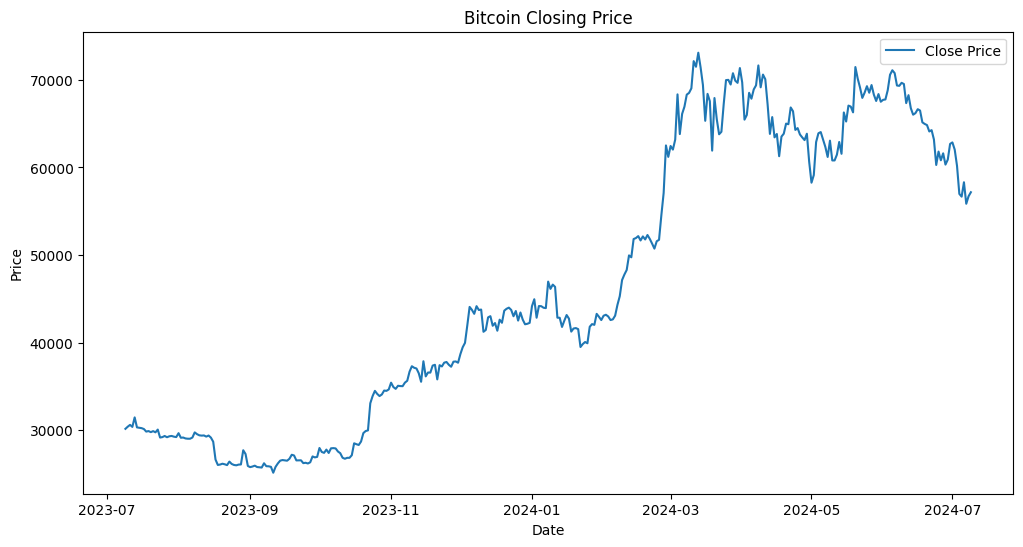




Stationarity Check for Close Price:
ADF Statistic: -1.1371428513830417
p-value: 0.7000348509231898
Critical Values:
  1%: -3.4490648539347544
  5%: -2.8697861692116478
  10%: -2.5711631253228306





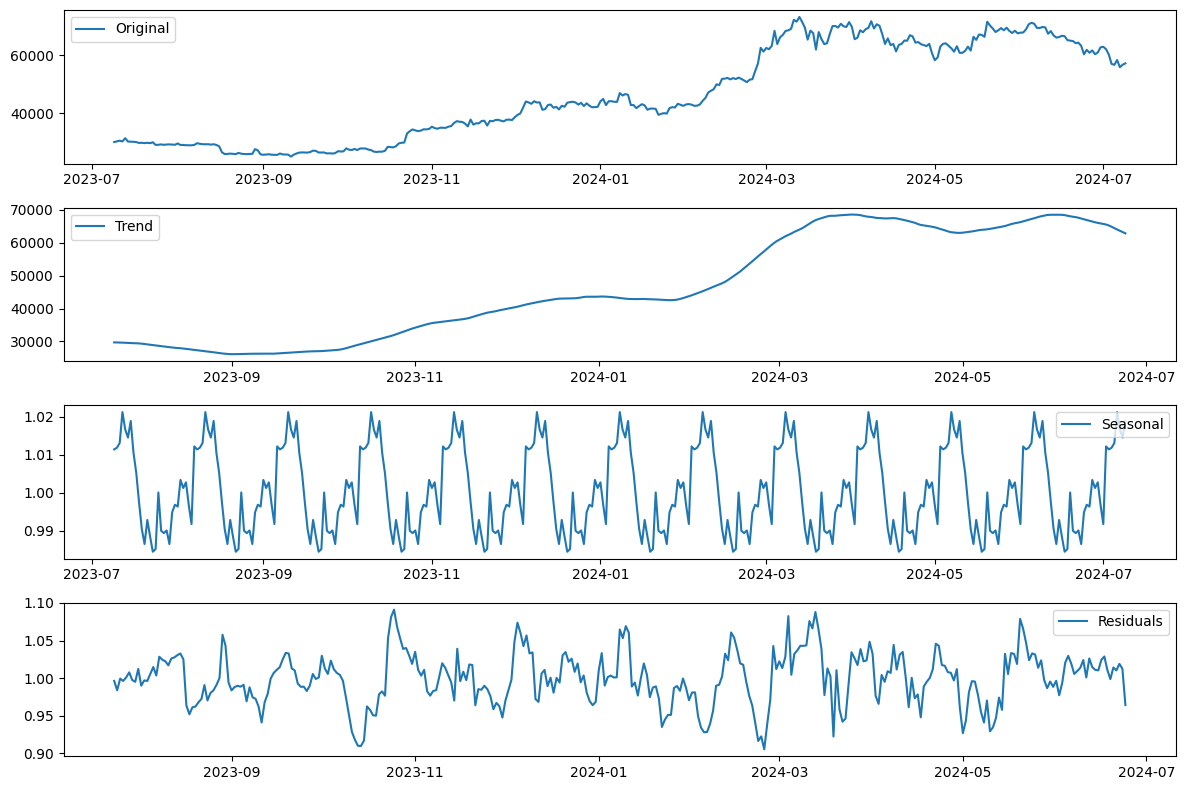

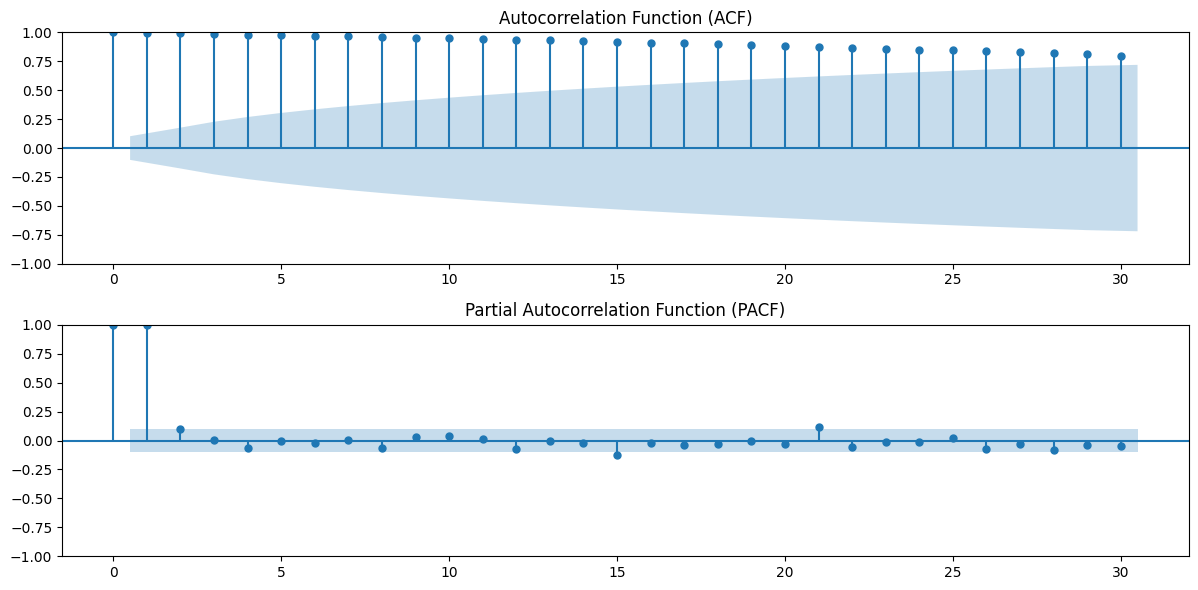

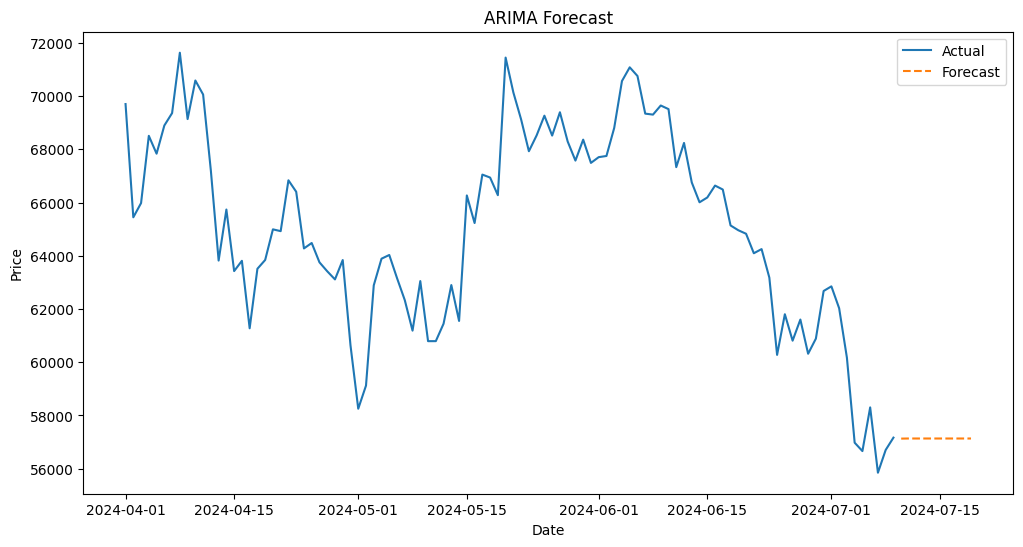

Root Mean Squared Error (RMSE): 3163.7404924066554


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the provided data (already in DataFrame df)
# Assuming df is already defined as per your earlier data format
df = pd.read_csv('/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv', header=0)

# Step 1: Ensure 'Date' column is datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Visualize the Time Series
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("\n\n")

# Step 3: Stationarity Check (ADF Test)
def stationarity_check(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

print('Stationarity Check for Close Price:')
stationarity_check(df['Close'])

print("\n\n")

# Step 4: Decompose the Time Series
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)  # Assuming weekly seasonality (30 days)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print("\n\n")

# Step 5: ACF and PACF Plots
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(df['Close'], lags=30, ax=plt.gca())  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(df['Close'], lags=30, ax=plt.gca())  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

print("\n\n")

# Step 6: ARIMA Modeling (Example)
# Example: Fit ARIMA(1, 1, 1) model
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Forecasting (Example: next 10 days)
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['Close'].tail(100), label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluation (Example: RMSE)
# Example: Compare forecast with actual data
actual_values = df['Close'].tail(forecast_steps)
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB
None
         Date          Open          High           Low         Close  \
0  2023-07-09  30291.611328  30427.589844  30085.591797  30171.234375   
1  2023-07-10  30172.423828  31026.083984  29985.394531  30414.470703   
2  2023-07-11  30417.632813  30788.314453  30358.097656  30620.951172   
3  2023-07-12  30622.246094  30959.964844  30228.835938  30391.646484   
4  2023-07-13  30387.488281  31814.515625  30268.351563  31476.048828   

      Adj Close       Volume 

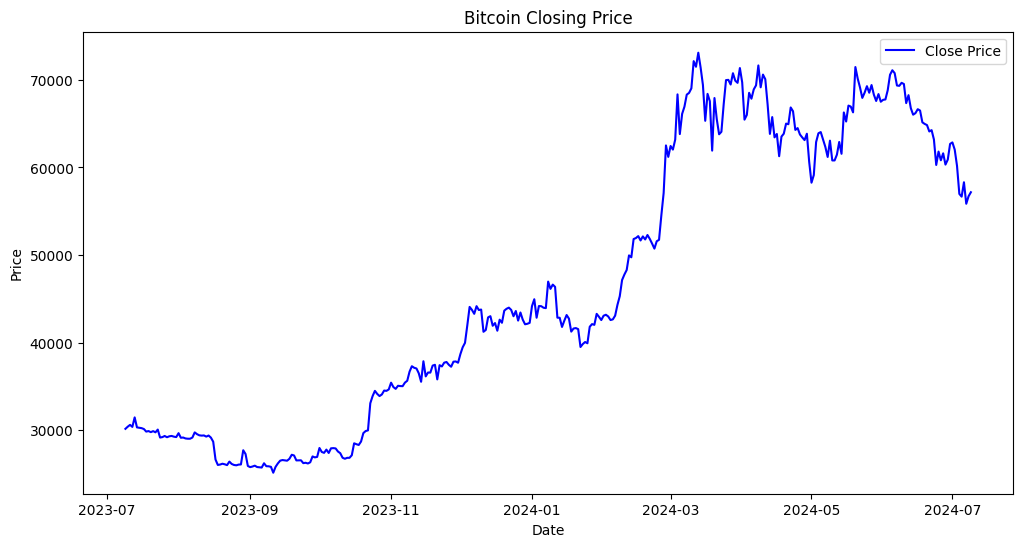

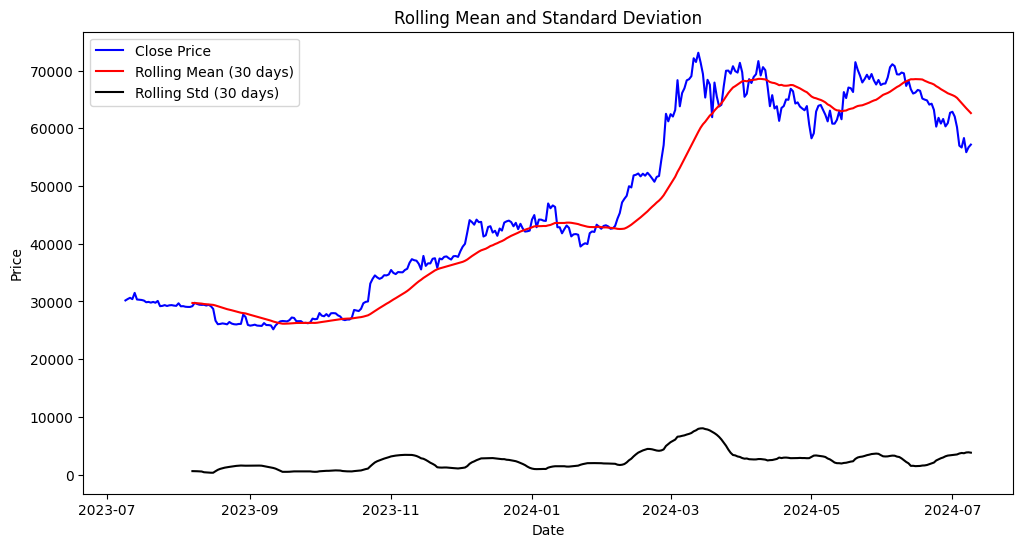

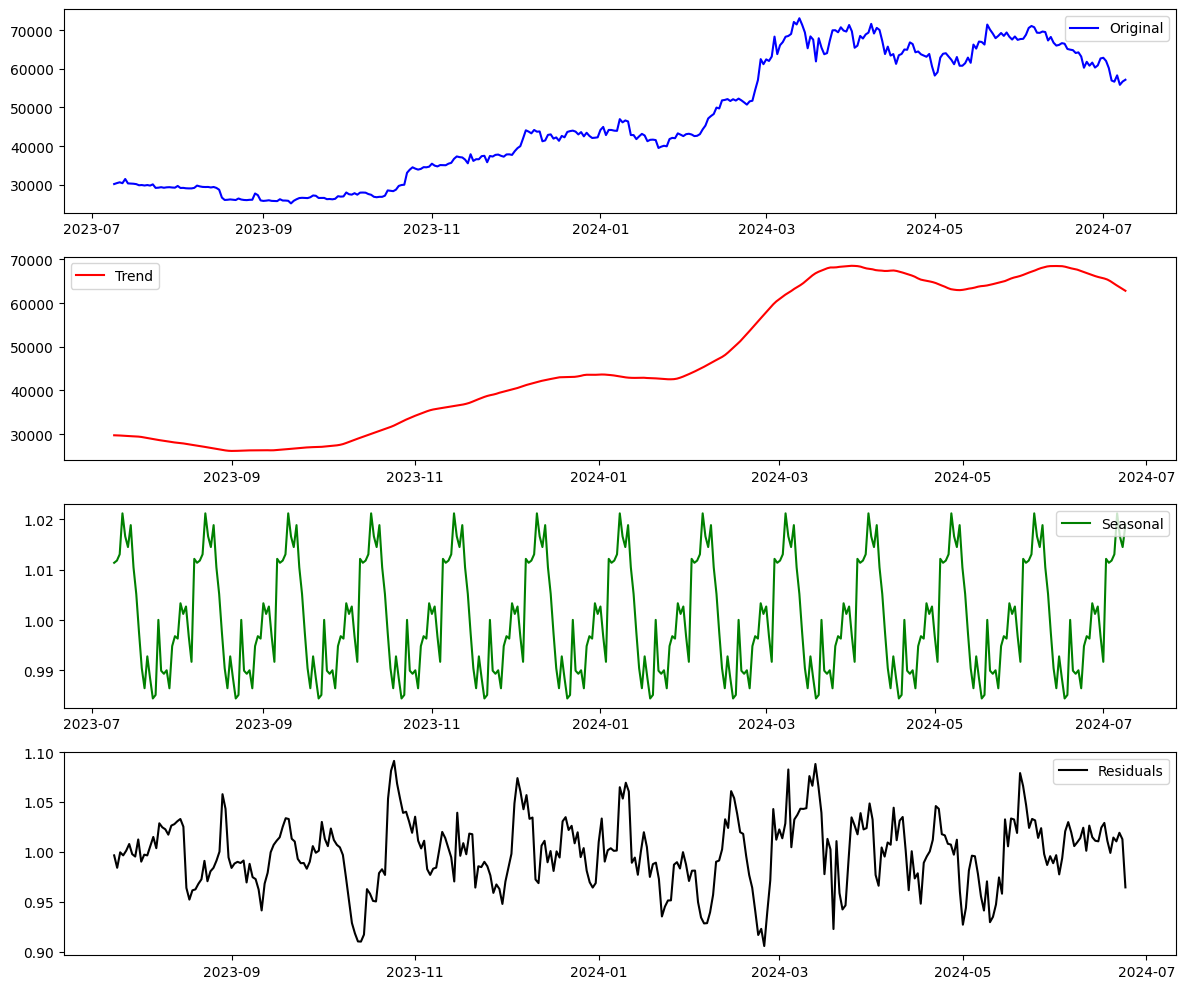

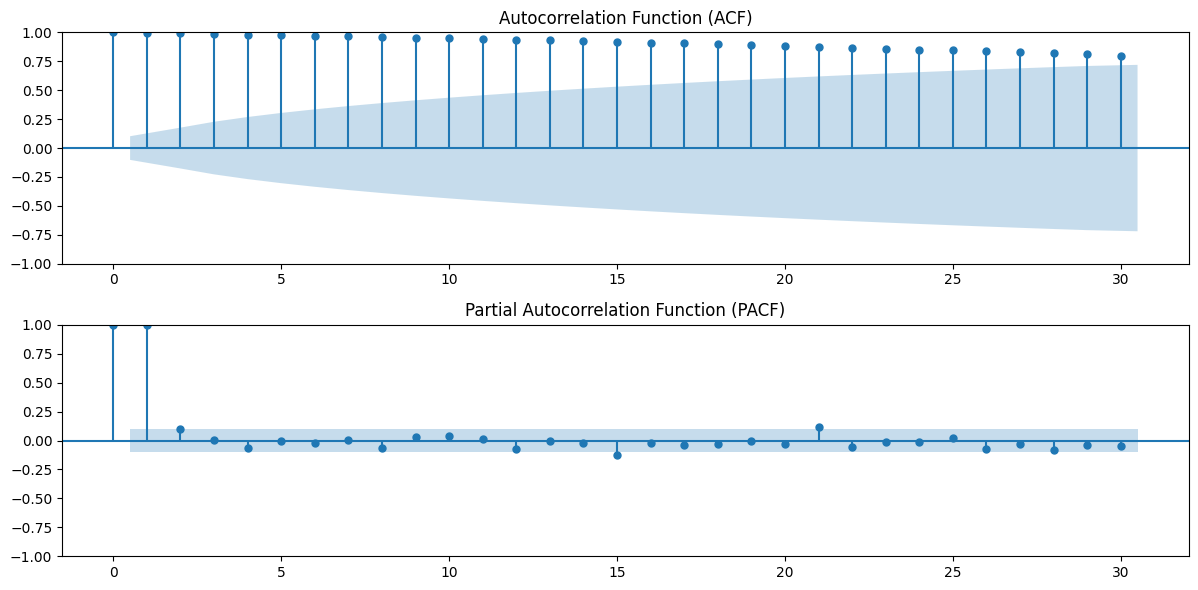

Stationarity Check for Close Price:
ADF Statistic: -1.1371428513830417
p-value: 0.7000348509231898
Critical Values:
  1%: -3.4490648539347544
  5%: -2.8697861692116478
  10%: -2.5711631253228306


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the data
file_path = '/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv'
df = pd.read_csv(file_path, header=0)

# Step 1: Basic EDA
print(df.info())
print(df.head())

# Step 2: Convert 'Date' column to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 4: Rolling Statistics (mean and standard deviation)
rolmean = df['Close'].rolling(window=30).mean()  # 30-day rolling mean
rolstd = df['Close'].rolling(window=30).std()   # 30-day rolling std

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(rolmean, label='Rolling Mean (30 days)', color='red')
plt.plot(rolstd, label='Rolling Std (30 days)', color='black')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 5: Seasonal Decomposition
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)  # Weekly seasonality (30 days)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='black')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Step 6: Autocorrelation and Partial Autocorrelation Functions
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(df['Close'], lags=30, ax=plt.gca(), title='Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(df['Close'], lags=30, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Step 7: Stationarity Check (ADF Test)
def stationarity_check(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

print('Stationarity Check for Close Price:')
stationarity_check(df['Close'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB
None
         Date          Open          High           Low         Close  \
0  2023-07-09  30291.611328  30427.589844  30085.591797  30171.234375   
1  2023-07-10  30172.423828  31026.083984  29985.394531  30414.470703   
2  2023-07-11  30417.632813  30788.314453  30358.097656  30620.951172   
3  2023-07-12  30622.246094  30959.964844  30228.835938  30391.646484   
4  2023-07-13  30387.488281  31814.515625  30268.351563  31476.048828   

      Adj Close       Volume 

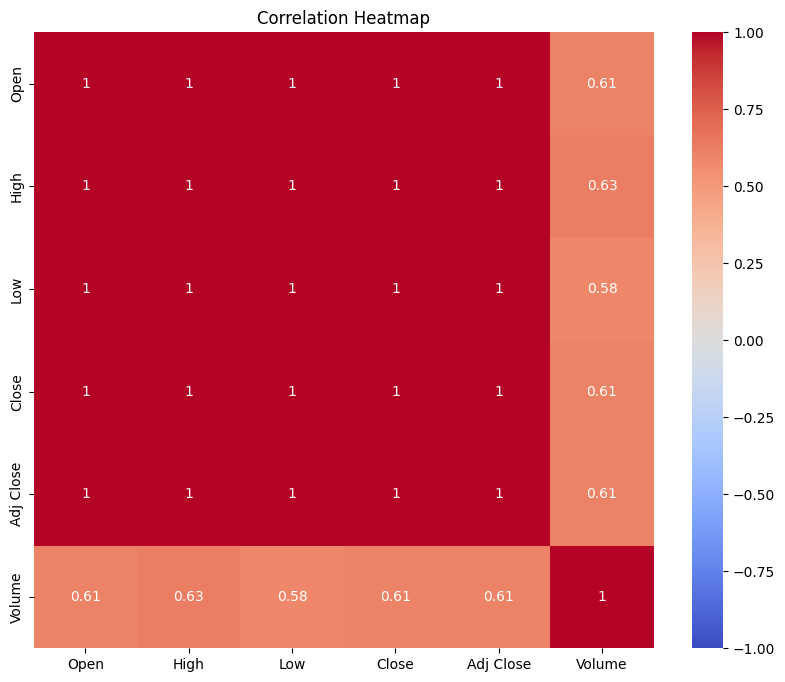

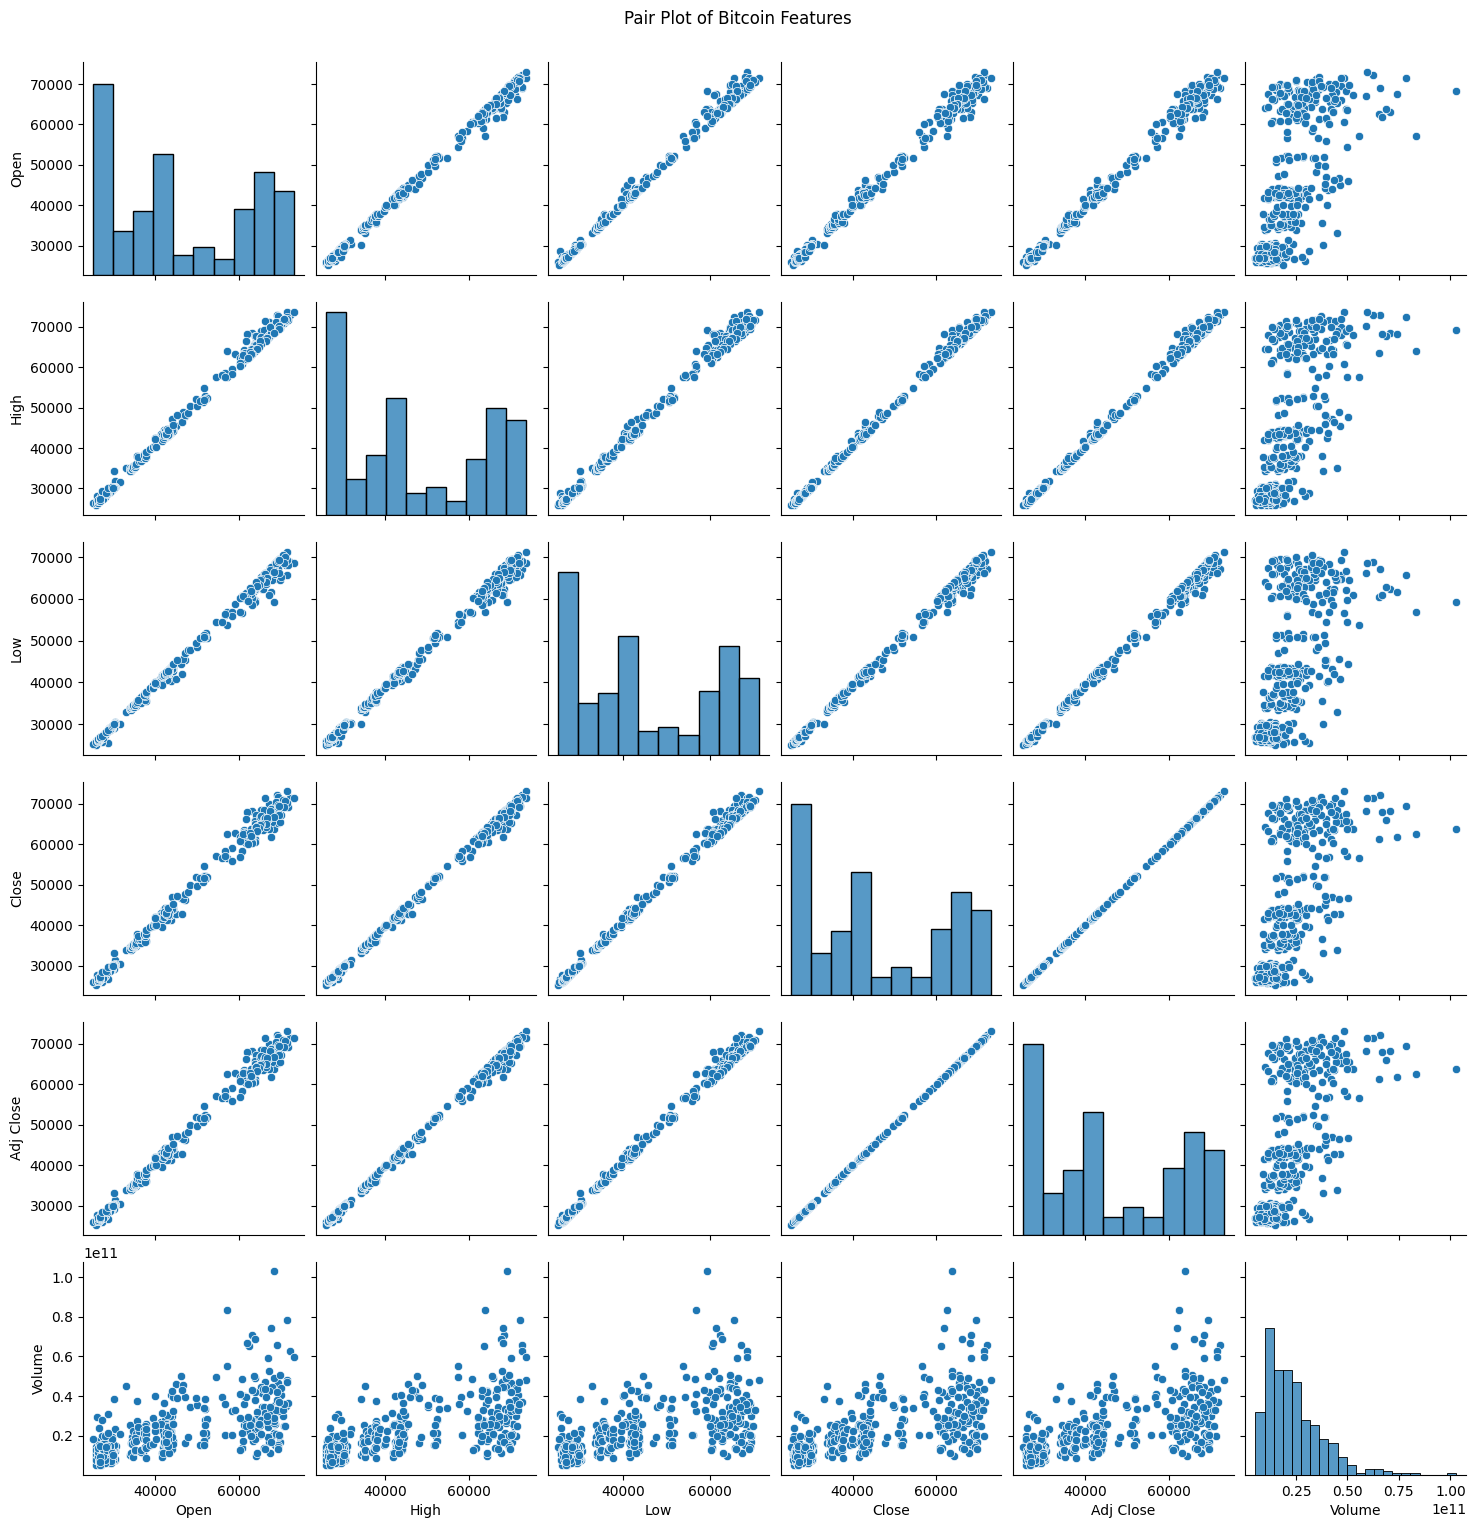

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv'
df = pd.read_csv(file_path, header=0)

# Step 1: Basic EDA
print(df.info())
print(df.head())

# Step 2: Convert 'Date' column to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Drop non-numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols]

# Step 4: Heatmap of Correlations
plt.figure(figsize=(10, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Step 5: Pair Plot
sns.pairplot(df_numeric, height=2.5)
plt.suptitle('Pair Plot of Bitcoin Features', y=1.02)
plt.show()


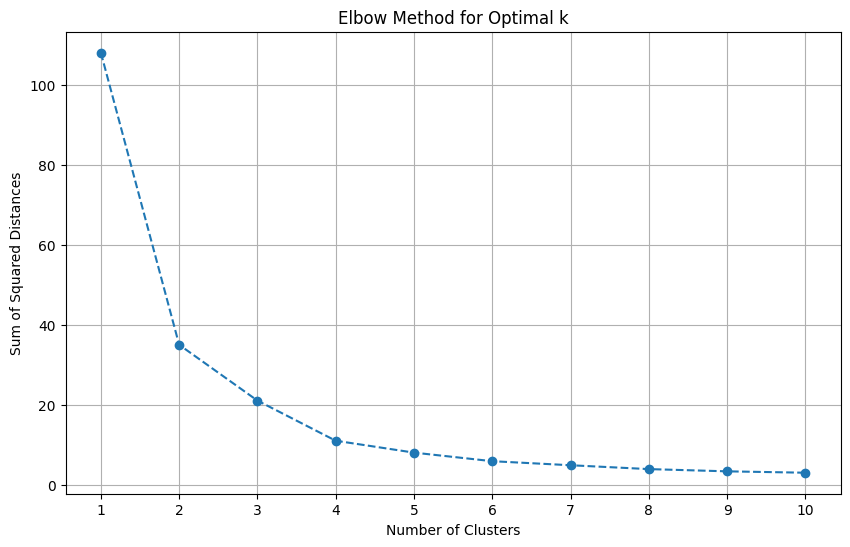

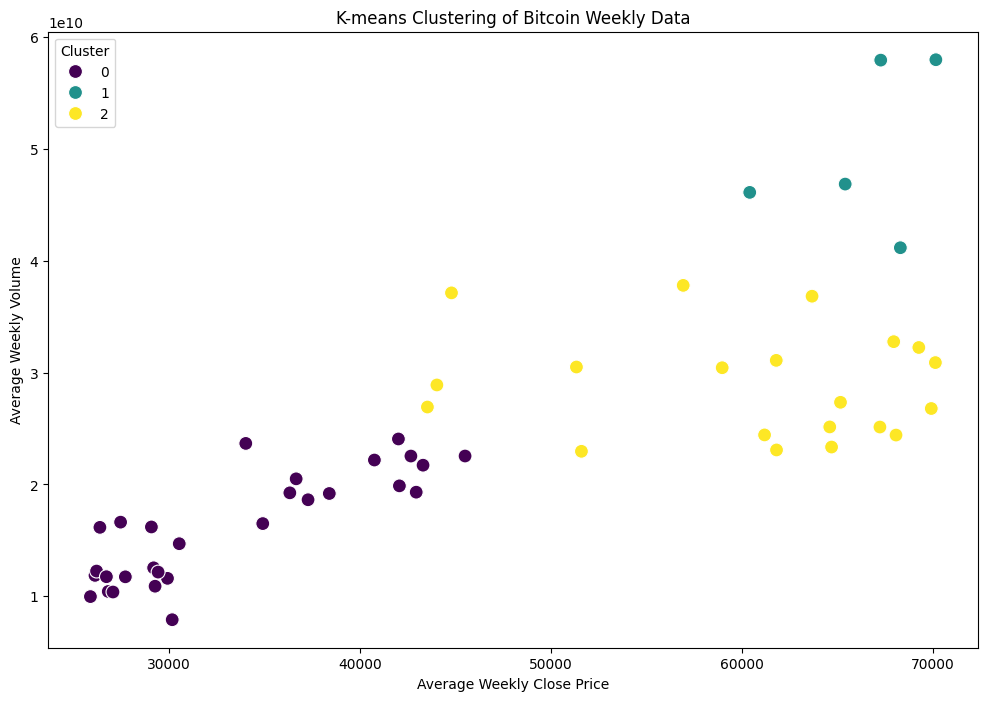

                Close        Volume
Cluster                            
0        33274.876309  1.611207e+10
1        66321.221987  5.002583e+10
2        60344.510059  2.891506e+10


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = '/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Resample data to weekly averages
df_weekly = df.resample('W').mean()

# Select features for clustering
features = ['Close', 'Volume']
X = df_weekly[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("\n\n\n")

# From the Elbow method, choose the optimal number of clusters (k)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df_weekly['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Close', y='Volume', hue='Cluster', data=df_weekly, palette='viridis', s=100)
plt.title('K-means Clustering of Bitcoin Weekly Data')
plt.xlabel('Average Weekly Close Price')
plt.ylabel('Average Weekly Volume')
plt.legend(title='Cluster')
plt.show()

# Print cluster centroids (average values for each cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)
cluster_df.index.name = 'Cluster'
print(cluster_df)


In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = '/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Resample data to weekly averages
df_weekly = df.resample('W').mean()

# Select features for clustering
features = ['Close', 'Volume']
X = df_weekly[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve using Plotly
fig = px.line(x=range(1, 11), y=sse, title='Elbow Method for Optimal k')
fig.update_layout(xaxis_title='Number of Clusters', yaxis_title='Sum of Squared Distances', xaxis=dict(tickmode='linear'))
fig.show()

# Choose the optimal number of clusters (k) based on the Elbow curve
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df_weekly['Cluster'] = kmeans.labels_

# Visualize the clusters using Plotly scatter plot
fig = px.scatter(df_weekly, x='Close', y='Volume', color='Cluster',
                 hover_data=['Close', 'Volume'], title='K-means Clustering of Bitcoin Weekly Data',
                 labels={'Close': 'Average Weekly Close Price', 'Volume': 'Average Weekly Volume'})
fig.show()

# Print cluster centroids (average values for each cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)
cluster_df.index.name = 'Cluster'
print(cluster_df)


                Close        Volume
Cluster                            
0        33274.876309  1.611207e+10
1        66321.221987  5.002583e+10
2        60344.510059  2.891506e+10


In [42]:
import pandas as pd
import plotly.graph_objs as go

# Load the data
file_path = '/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Create traces for each series
trace_close = go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price')
trace_volume = go.Scatter(x=df.index, y=df['Volume'], mode='lines', name='Volume', yaxis='y2')

# Define layout
layout = go.Layout(
    title='Bitcoin Price and Volume Time Series',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', side='left', showgrid=False),
    yaxis2=dict(title='Volume', side='right', overlaying='y', showgrid=False)
)

# Create figure and add traces
fig = go.Figure(data=[trace_close, trace_volume], layout=layout)

# Show plot
fig.show()


In [45]:
import pandas as pd
import plotly.figure_factory as ff

# Load the data
file_path = '/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Exclude non-numeric columns (like Date)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap using Plotly
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  colorscale='Viridis',
                                  showscale=True)

fig.update_layout(title='Correlation Heatmap of Bitcoin Features',
                  xaxis_title='Features',
                  yaxis_title='Features')
fig.show()


In [48]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = '/content/drive/MyDrive/SeSAC/SeSAC_Study/data/BTC-USD.csv'
df = pd.read_csv(file_path)

# Create pair plot using Plotly
fig = px.scatter_matrix(df, dimensions=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
                        title='Pair Plot of Bitcoin Features')

fig.update_traces(diagonal_visible=False)

# Adjusting the layout to increase plot size
fig.update_layout(
    width=1000,  # Adjust width as needed
    height=800,  # Adjust height as needed
    title='Pair Plot of Bitcoin Features'
)

fig.show()